In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


mp_df = pd.read_csv("data/mp_full.csv")
vp_df = pd.read_csv("data/vp_full.csv")
mp_report_counts = mp_df['misperid'].value_counts()
vp_report_counts = vp_df['misper_misperid'].value_counts()


In [2]:
advancedpattern_results = pd.read_csv("results/1/advanced_patterns.csv")

advancedpattern_results

,Unnamed: 0,exact_matches,partial_matches,len_cosine_sim_truth,missing_from_truth,len_summ,len_truth,total_inserted,cosine_sim_pat_extract,pat_in_extracted_sentence,pxtraced_pattern_not_in_text_hall,pxtraced_pattern_in_text_hall,extracted_sentence_not_in_text_hall,extracted_sentence_in_text_hall,set_summ,set_truth,cosine_sim_truth,try_count,len_recognized_patterns,misperid
0,0,0,1,0,1,4,2,4,0.326350,0,4,0,0,4,"{'related interest location pattern', 'no show...","{'believed to be camping', 'personality change...",[],1,4,42
1,1,1,3,0,1,13,5,13,0.414585,0,22,0,2,20,"{'sudden departure pattern', 'domestic violenc...","{'contacted a stranger before vanishing', 'lef...",[],1,13,51
2,2,0,2,0,0,8,2,8,0.399376,4,4,6,0,10,"{'hiking with friend disconnection pattern', '...","{'disconnected from support services', 'lost w...",[],1,8,157
3,3,0,3,0,1,6,4,6,0.611168,0,58,0,3,55,"{'solitude desire pattern', 'secluded area pat...","{'possible sea kayaking accident', 'contacted ...",[],1,6,190
4,4,3,3,1,1,15,6,15,0.361369,5,14,1,0,15,"{'sudden religious conversion pattern', 'plann...","{'withdrew cash before leaving', 'illegal empl...","[('travelled without telling family', 'travel ...",1,15,212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,135,0,2,0,3,6,5,6,0.401323,6,1,10,1,10,"{'medication missed pattern', 'off grid lifest...","{'did not collect medication', 'missing since ...",[],1,6,9886
296,136,0,1,0,2,10,3,10,0.433346,0,12,0,1,11,"{'social activity pattern', 'library pattern',...","{'used aliases in past', 'last seen at train s...",[],1,10,9906
297,137,0,2,0,2,6,4,6,0.240737,3,4,7,0,11,"{'train boarding pattern', 'squatting activity...","{'possibly involved in cult', 'had maps of hig...",[],1,6,9950
298,138,0,3,0,1,15,4,15,0.255809,8,1,28,1,28,{'criminal activity related disappearance patt...,"{'believed to be in forested area', 'left behi...",[],1,15,9960


In [3]:
advancedpattern_results = advancedpattern_results.drop(advancedpattern_results.columns[0], axis=1)
advancedpattern_results['number_of_mp_reports_in_a_case'] = advancedpattern_results['misperid'].map(mp_report_counts)
advancedpattern_results['number_of_vp_reports_in_a_case'] = advancedpattern_results['misperid'].map(vp_report_counts)
advancedpattern_results['number_of_all_reports_in_a_case'] = advancedpattern_results['number_of_mp_reports_in_a_case'] + advancedpattern_results['number_of_vp_reports_in_a_case'] 
advancedpattern_results['pat_in_extracted_sentence_fraction'] = advancedpattern_results['pat_in_extracted_sentence']/advancedpattern_results['len_summ']
advancedpattern_results ['extraced_pattern_in_text_fraq'] = advancedpattern_results['pxtraced_pattern_in_text_hall']/ (advancedpattern_results['pxtraced_pattern_in_text_hall'] + advancedpattern_results['pxtraced_pattern_not_in_text_hall'] )
advancedpattern_results['hall'] = advancedpattern_results['len_summ'] - advancedpattern_results['pat_in_extracted_sentence']
advancedpattern_results['extracted_sentence_not_in_text_hall_frac'] = advancedpattern_results['extracted_sentence_in_text_hall'] / (advancedpattern_results['extracted_sentence_not_in_text_hall'] +advancedpattern_results['extracted_sentence_in_text_hall']  )



In [4]:
advancedpattern_results

,exact_matches,partial_matches,len_cosine_sim_truth,missing_from_truth,len_summ,len_truth,total_inserted,cosine_sim_pat_extract,pat_in_extracted_sentence,pxtraced_pattern_not_in_text_hall,...,try_count,len_recognized_patterns,misperid,number_of_mp_reports_in_a_case,number_of_vp_reports_in_a_case,number_of_all_reports_in_a_case,pat_in_extracted_sentence_fraction,extraced_pattern_in_text_fraq,hall,extracted_sentence_not_in_text_hall_frac
0,0,1,0,1,4,2,4,0.326350,0,4,...,1,4,42,2,2.0,4.0,0.000000,0.000000,4,1.000000
1,1,3,0,1,13,5,13,0.414585,0,22,...,1,13,51,16,13.0,29.0,0.000000,0.000000,13,0.909091
2,0,2,0,0,8,2,8,0.399376,4,4,...,1,8,157,5,8.0,13.0,0.500000,0.600000,4,1.000000
3,0,3,0,1,6,4,6,0.611168,0,58,...,1,6,190,15,4.0,19.0,0.000000,0.000000,6,0.948276
4,3,3,1,1,15,6,15,0.361369,5,14,...,1,15,212,14,5.0,19.0,0.333333,0.066667,10,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0,2,0,3,6,5,6,0.401323,6,1,...,1,6,9886,6,13.0,19.0,1.000000,0.909091,0,0.909091
296,0,1,0,2,10,3,10,0.433346,0,12,...,1,10,9906,11,8.0,19.0,0.000000,0.000000,10,0.916667
297,0,2,0,2,6,4,6,0.240737,3,4,...,1,6,9950,9,8.0,17.0,0.500000,0.636364,3,1.000000
298,0,3,0,1,15,4,15,0.255809,8,1,...,1,15,9960,19,20.0,39.0,0.533333,0.965517,7,0.965517


In [5]:
# Type I
advancedpattern_results['pat_in_extracted_sentence_fraction'].describe()

count    300.000000
mean       0.267206
std        0.343716
min        0.000000
25%        0.000000
50%        0.080128
75%        0.500000
max        1.000000
Name: pat_in_extracted_sentence_fraction, dtype: float64

In [6]:
# Type II
advancedpattern_results['extraced_pattern_in_text_fraq'].describe()

count    300.000000
mean       0.214416
std        0.309425
min        0.000000
25%        0.000000
50%        0.022266
75%        0.358456
max        1.000000
Name: extraced_pattern_in_text_fraq, dtype: float64

In [7]:
# correct quotes
advancedpattern_results['extracted_sentence_not_in_text_hall_frac'].describe()

count    300.000000
mean       0.865840
std        0.221057
min        0.000000
25%        0.857143
50%        0.937500
75%        1.000000
max        1.000000
Name: extracted_sentence_not_in_text_hall_frac, dtype: float64

In [8]:
advancedpattern_results['cosine_sim_pat_extract'].describe()

count    300.000000
mean       0.395822
std        0.163779
min        0.058752
25%        0.293972
50%        0.393020
75%        0.479440
max        1.000000
Name: cosine_sim_pat_extract, dtype: float64

In [9]:
advancedpattern_results[advancedpattern_results['try_count']>1]

,exact_matches,partial_matches,len_cosine_sim_truth,missing_from_truth,len_summ,len_truth,total_inserted,cosine_sim_pat_extract,pat_in_extracted_sentence,pxtraced_pattern_not_in_text_hall,...,try_count,len_recognized_patterns,misperid,number_of_mp_reports_in_a_case,number_of_vp_reports_in_a_case,number_of_all_reports_in_a_case,pat_in_extracted_sentence_fraction,extraced_pattern_in_text_fraq,hall,extracted_sentence_not_in_text_hall_frac
15,0,3,0,2,10,5,10,0.365954,3,7,...,4,10,453,26,13.0,39.0,0.300000,0.300000,7,0.900000
16,0,3,0,1,14,4,14,0.365383,0,14,...,2,14,459,12,12.0,24.0,0.000000,0.000000,14,1.000000
35,0,2,0,1,2,3,2,0.456830,0,5,...,2,2,1019,34,10.0,44.0,0.000000,0.000000,2,0.600000
68,0,1,0,0,19,1,19,0.453464,6,17,...,3,19,2075,12,2.0,14.0,0.315789,0.190476,13,0.952381
113,0,1,1,3,8,5,8,0.448576,0,43,...,2,8,3717,15,6.0,21.0,0.000000,0.000000,8,0.976744
137,1,4,0,1,11,6,11,0.487715,0,29,...,2,11,4503,15,6.0,21.0,0.000000,0.000000,11,0.827586
146,1,1,0,0,4,2,4,0.420356,1,11,...,2,4,4651,21,10.0,31.0,0.250000,0.266667,3,0.933333
149,0,2,0,1,10,3,10,0.479000,0,11,...,2,10,4812,5,3.0,8.0,0.000000,0.000000,10,0.909091
169,0,0,0,5,2,5,2,0.118848,2,32,...,2,3,5533,33,11.0,44.0,1.000000,0.000000,0,0.062500
178,0,1,0,1,9,2,9,0.257120,1,18,...,2,9,5806,12,20.0,32.0,0.111111,0.400000,8,1.000000


Descriptive Statistics:

count    300.000
mean       1.100
std        0.429
min        1.000
25%        1.000
50%        1.000
75%        1.000
max        5.000
Name: try_count, dtype: float64


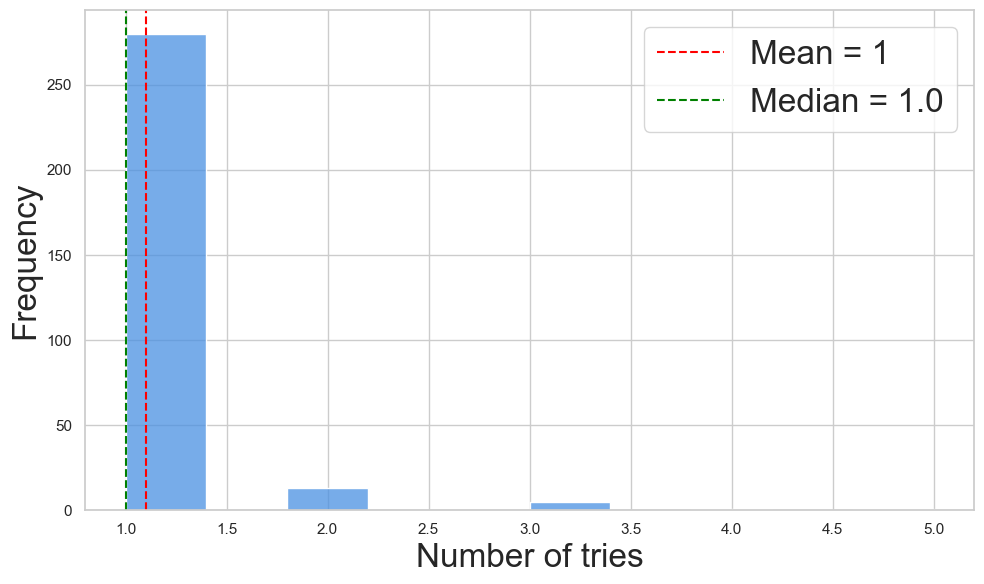

In [18]:
col = 'try_count'
df = advancedpattern_results 
desc_stats = df[col].describe()
print("Descriptive Statistics:\n")
print(desc_stats.round(3))

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

df[col] = df[col]
sns.histplot(df[col], bins=10, kde=False, color="#4A90E2", edgecolor="white")

mean_val = df[col].mean()
median_val = df[col].median()
plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean = {mean_val:.0f}')
plt.axvline(median_val, color='green', linestyle='--', label=f'Median = {median_val:.20}')

plt.xlabel("Number of tries", fontsize=24)
plt.ylabel("Frequency", fontsize=24)
plt.legend(fontsize=24)
plt.savefig("utils/plots2/advanced_patterns_try.svg", bbox_inches='tight')
plt.tight_layout()

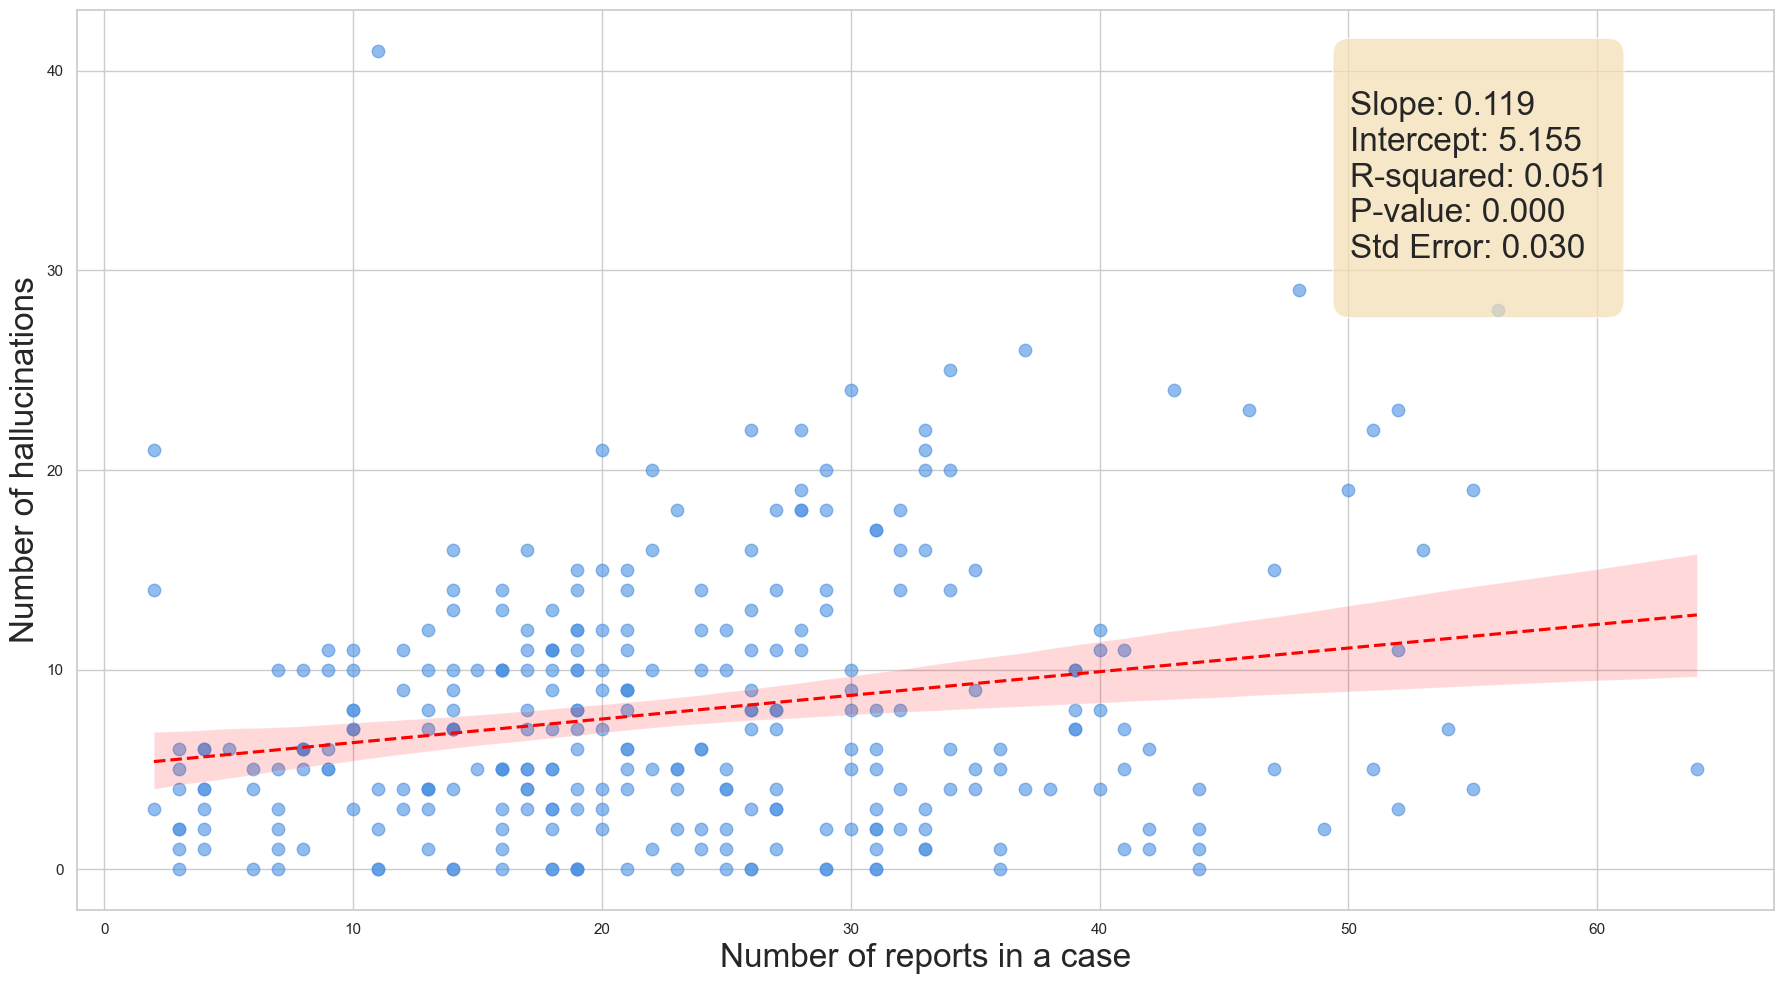

      Regression Statistics
Slope: 0.1185
Intercept: 5.1554
R-value (Correlation Coefficient): 0.2255
R-squared: 0.0508
P-value: 0.0001
Standard Error of the Estimate: 0.0298


Descriptive Statistics for X-Axis:

count    298.000
mean      23.326
std       12.276
min        2.000
25%       14.250
50%       21.000
75%       31.000
max       64.000
Name: number_of_all_reports_in_a_case, dtype: float64


Descriptive Statistics for Y-Axis:

count    300.000
mean       7.907
std        6.441
min        0.000
25%        3.000
50%        6.000
75%       11.000
max       41.000
Name: hall, dtype: float64


In [11]:
# Type I
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

df = advancedpattern_results.copy()
y_axis_col= 'hall'
x_axis_col = 'number_of_all_reports_in_a_case'

clean_df = df[[x_axis_col, y_axis_col]].dropna()
slope, intercept, r_value, p_value, std_err = linregress(
    clean_df[x_axis_col],
    clean_df[y_axis_col]
)
r_squared = r_value**2

sns.set_theme(style="whitegrid")
plt.figure(figsize=(18, 10))

scatter_plot = sns.regplot(
    x=x_axis_col,
    y=y_axis_col,
    data=df,
    scatter_kws={'alpha': 0.6, 's': 80, 'color': '#4A90E2'}, # Style the points
    line_kws={'color': 'red', 'linestyle': '--'} # Style the regression line
)

plt.xlabel('Number of reports in a case', fontsize=24)
plt.ylabel('Number of hallucinations', fontsize=24)

stats_text = f"""
Slope: {slope:.3f}
Intercept: {intercept:.3f}
R-squared: {r_squared:.3f}
P-value: {p_value:.3f}
Std Error: {std_err:.3f}
"""


plt.text(0.75, 0.95, stats_text, transform=plt.gca().transAxes, fontsize=24,
         verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.7))

plt.tight_layout()
plt.savefig("plots/typeI.svg", bbox_inches='tight')

plt.show()
print("="*40)
print("      Regression Statistics")
print("="*40)
print(f"Slope: {slope:.4f}")
print(f"Intercept: {intercept:.4f}")
print(f"R-value (Correlation Coefficient): {r_value:.4f}")
print(f"R-squared: {r_squared:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Standard Error of the Estimate: {std_err:.4f}")
print("\n" + "="*40 + "\n")

print("Descriptive Statistics for X-Axis:\n")
print(df[x_axis_col].describe().round(3))
print("\n" + "="*40 + "\n")
print("Descriptive Statistics for Y-Axis:\n")
print(df[y_axis_col].describe().round(3))


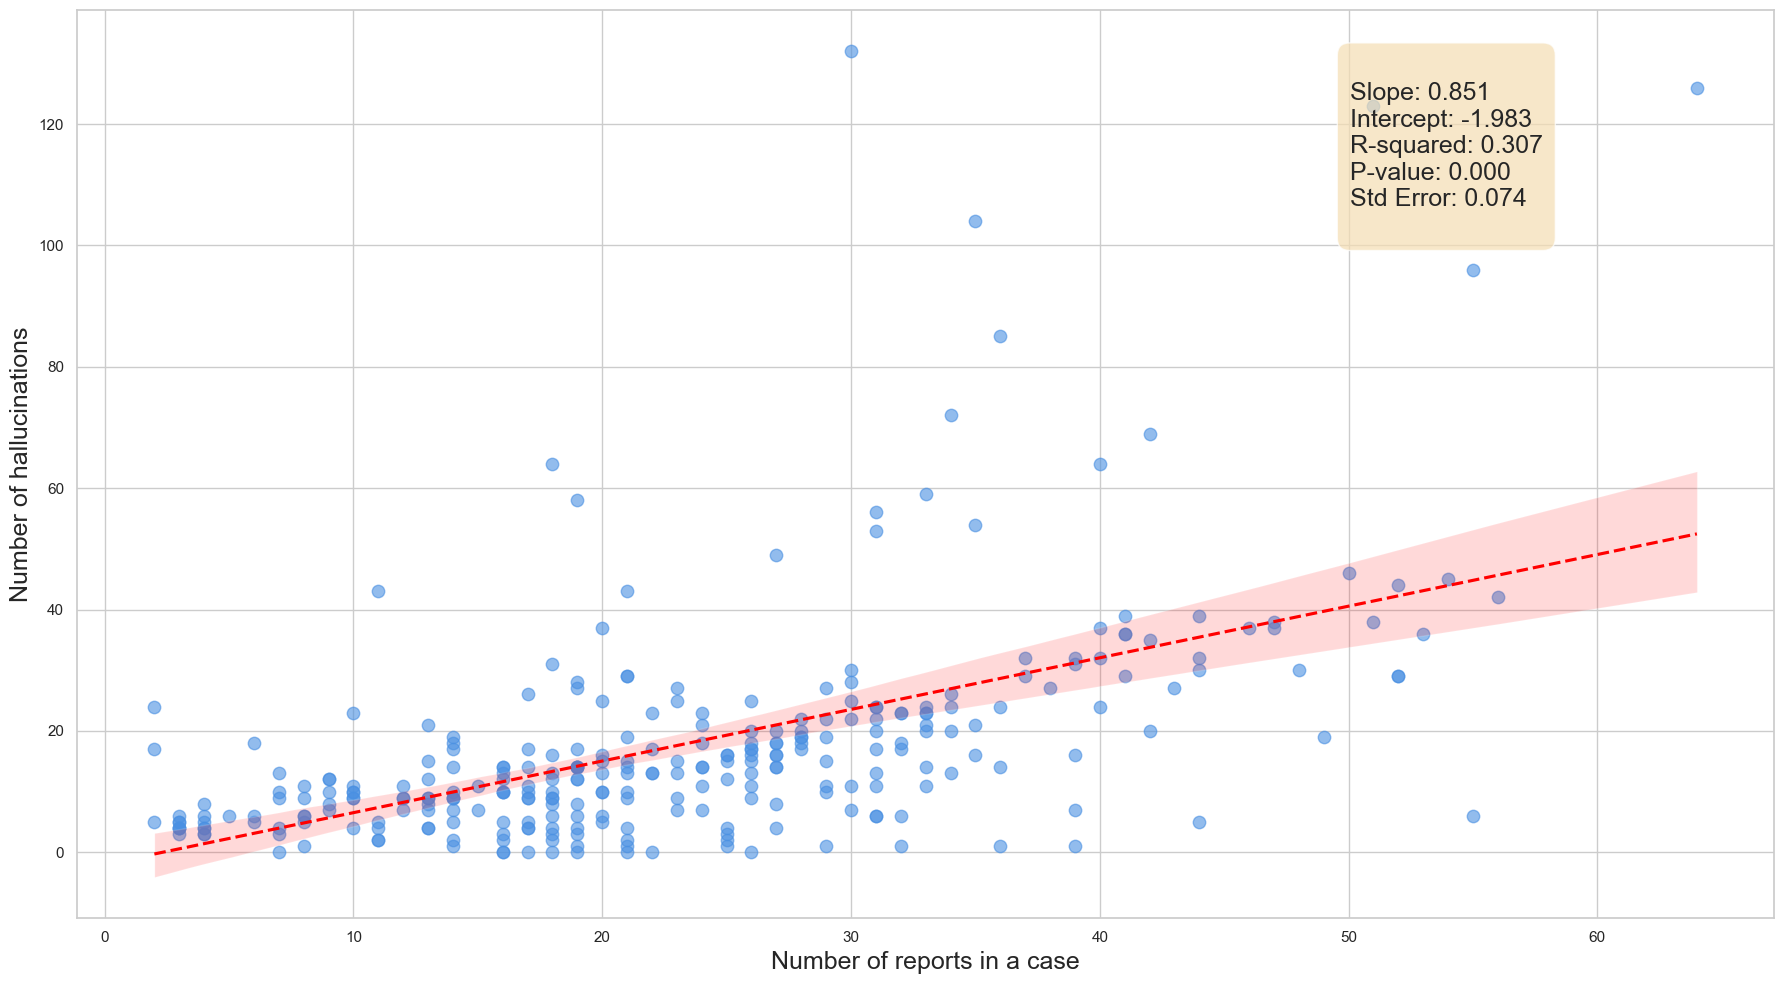

      Regression Statistics
Slope: 0.8508
Intercept: -1.9833
R-value (Correlation Coefficient): 0.5539
R-squared: 0.3068
P-value: 0.0000
Standard Error of the Estimate: 0.0743


Descriptive Statistics for X-Axis:

count    298.000
mean      23.326
std       12.276
min        2.000
25%       14.250
50%       21.000
75%       31.000
max       64.000
Name: number_of_all_reports_in_a_case, dtype: float64


Descriptive Statistics for Y-Axis:

count    300.000
mean      17.793
std       18.814
min        0.000
25%        6.000
50%       13.000
75%       23.000
max      132.000
Name: pxtraced_pattern_not_in_text_hall, dtype: float64


In [12]:
# Type II
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

df = advancedpattern_results.copy()
y_axis_col= 'pxtraced_pattern_not_in_text_hall'
x_axis_col = 'number_of_all_reports_in_a_case'


clean_df = df[[x_axis_col, y_axis_col]].dropna()
slope, intercept, r_value, p_value, std_err = linregress(
    clean_df[x_axis_col],
    clean_df[y_axis_col]
)
r_squared = r_value**2


sns.set_theme(style="whitegrid")
plt.figure(figsize=(18, 10))

scatter_plot = sns.regplot(
    x=x_axis_col,
    y=y_axis_col,
    data=df,
    scatter_kws={'alpha': 0.6, 's': 80, 'color': '#4A90E2'},
    line_kws={'color': 'red', 'linestyle': '--'}
)

plt.xlabel('Number of reports in a case', fontsize=18)
plt.ylabel('Number of hallucinations', fontsize=18)

stats_text = f"""
Slope: {slope:.3f}
Intercept: {intercept:.3f}
R-squared: {r_squared:.3f}
P-value: {p_value:.3f}
Std Error: {std_err:.3f}
"""
plt.text(0.75, 0.95, stats_text, transform=plt.gca().transAxes, fontsize=18,
         verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.7))
plt.tight_layout()
plt.savefig("plots/typeII.svg", bbox_inches='tight')

plt.show()
print("="*40)
print("      Regression Statistics")
print("="*40)
print(f"Slope: {slope:.4f}")
print(f"Intercept: {intercept:.4f}")
print(f"R-value (Correlation Coefficient): {r_value:.4f}")
print(f"R-squared: {r_squared:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Standard Error of the Estimate: {std_err:.4f}")
print("\n" + "="*40 + "\n")

print("Descriptive Statistics for X-Axis:\n")
print(df[x_axis_col].describe().round(3))
print("\n" + "="*40 + "\n")
print("Descriptive Statistics for Y-Axis:\n")
print(df[y_axis_col].describe().round(3))


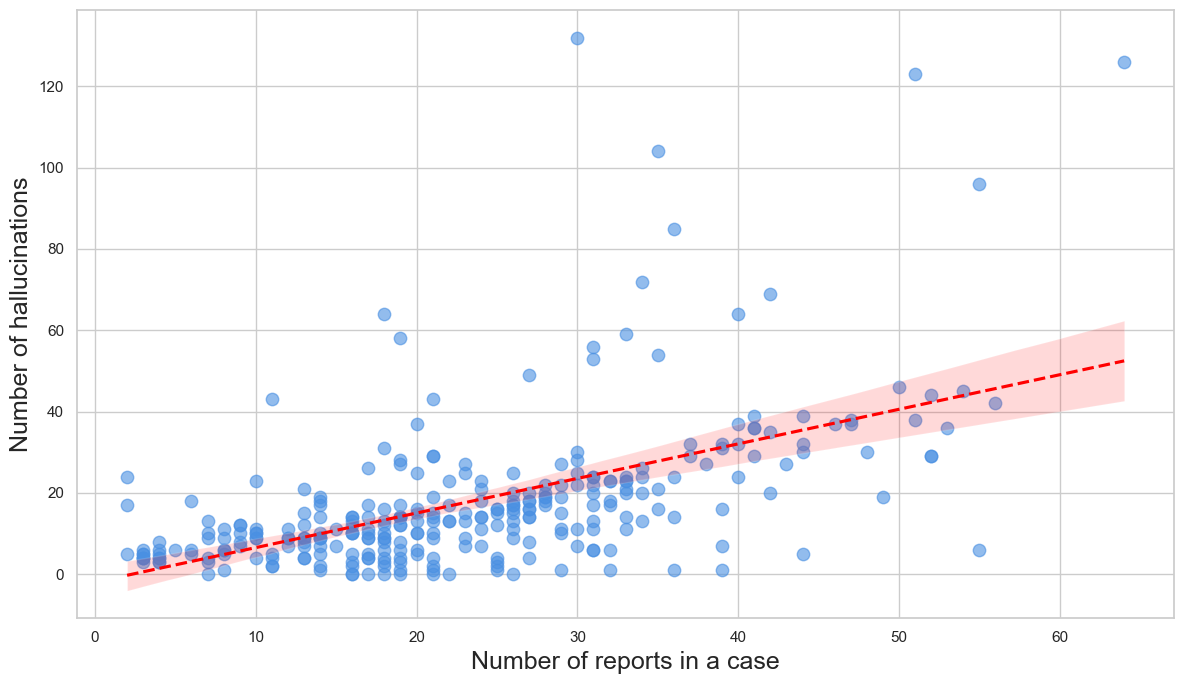

      Regression Statistics
Slope: 0.8508
Intercept: -1.9833
R-value (Correlation Coefficient): 0.5539
R-squared: 0.3068
P-value: 0.0000
Standard Error of the Estimate: 0.0743


Descriptive Statistics for X-Axis:

count    298.000
mean      23.326
std       12.276
min        2.000
25%       14.250
50%       21.000
75%       31.000
max       64.000
Name: number_of_all_reports_in_a_case, dtype: float64


Descriptive Statistics for Y-Axis:

count    300.000
mean      17.793
std       18.814
min        0.000
25%        6.000
50%       13.000
75%       23.000
max      132.000
Name: pxtraced_pattern_not_in_text_hall, dtype: float64


In [13]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

df = advancedpattern_results.copy()
y_axis_col= 'pxtraced_pattern_not_in_text_hall'
x_axis_col = 'number_of_all_reports_in_a_case'




clean_df = df[[x_axis_col, y_axis_col]].dropna()
slope, intercept, r_value, p_value, std_err = linregress(
    clean_df[x_axis_col],
    clean_df[y_axis_col]
)
r_squared = r_value**2


sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 7))

scatter_plot = sns.regplot(
    x=x_axis_col,
    y=y_axis_col,
    data=df,
    scatter_kws={'alpha': 0.6, 's': 80, 'color': '#4A90E2'}, 
    line_kws={'color': 'red', 'linestyle': '--'} # Style the regression line
)

plt.xlabel('Number of reports in a case', fontsize=18)
plt.ylabel('Number of hallucinations', fontsize=18)

stats_text = f"""
Slope: {slope:.3f}
Intercept: {intercept:.3f}
R-squared: {r_squared:.3f}
P-value: {p_value:.3f}
Std Error: {std_err:.3f}
"""
# plt.text(0.75, 0.95, stats_text, transform=plt.gca().transAxes, fontsize=18,
#          verticalalignment='top', bbox=dict(boxstyle='roun
plt.tight_layout()
plt.savefig("plots/typeIIIpattern_advanced.svg", bbox_inches='tight')

plt.show()



print("="*40)
print("      Regression Statistics")
print("="*40)
print(f"Slope: {slope:.4f}")
print(f"Intercept: {intercept:.4f}")
print(f"R-value (Correlation Coefficient): {r_value:.4f}")
print(f"R-squared: {r_squared:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Standard Error of the Estimate: {std_err:.4f}")
print("\n" + "="*40 + "\n")

print("Descriptive Statistics for X-Axis:\n")
print(df[x_axis_col].describe().round(3))
print("\n" + "="*40 + "\n")
print("Descriptive Statistics for Y-Axis:\n")
print(df[y_axis_col].describe().round(3))


In [14]:
advancedpattern_results

,exact_matches,partial_matches,len_cosine_sim_truth,missing_from_truth,len_summ,len_truth,total_inserted,cosine_sim_pat_extract,pat_in_extracted_sentence,pxtraced_pattern_not_in_text_hall,...,try_count,len_recognized_patterns,misperid,number_of_mp_reports_in_a_case,number_of_vp_reports_in_a_case,number_of_all_reports_in_a_case,pat_in_extracted_sentence_fraction,extraced_pattern_in_text_fraq,hall,extracted_sentence_not_in_text_hall_frac
0,0,1,0,1,4,2,4,0.326350,0,4,...,1,4,42,2,2.0,4.0,0.000000,0.000000,4,1.000000
1,1,3,0,1,13,5,13,0.414585,0,22,...,1,13,51,16,13.0,29.0,0.000000,0.000000,13,0.909091
2,0,2,0,0,8,2,8,0.399376,4,4,...,1,8,157,5,8.0,13.0,0.500000,0.600000,4,1.000000
3,0,3,0,1,6,4,6,0.611168,0,58,...,1,6,190,15,4.0,19.0,0.000000,0.000000,6,0.948276
4,3,3,1,1,15,6,15,0.361369,5,14,...,1,15,212,14,5.0,19.0,0.333333,0.066667,10,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0,2,0,3,6,5,6,0.401323,6,1,...,1,6,9886,6,13.0,19.0,1.000000,0.909091,0,0.909091
296,0,1,0,2,10,3,10,0.433346,0,12,...,1,10,9906,11,8.0,19.0,0.000000,0.000000,10,0.916667
297,0,2,0,2,6,4,6,0.240737,3,4,...,1,6,9950,9,8.0,17.0,0.500000,0.636364,3,1.000000
298,0,3,0,1,15,4,15,0.255809,8,1,...,1,15,9960,19,20.0,39.0,0.533333,0.965517,7,0.965517


In [15]:
denom = advancedpattern_results['exact_matches'] + advancedpattern_results['total_inserted'] + advancedpattern_results['partial_matches']+ advancedpattern_results['len_cosine_sim_truth']
advancedpattern_results['exact_precision'] = advancedpattern_results['exact_matches'] / denom
advancedpattern_results['part_precision'] =  (advancedpattern_results['exact_matches'] + advancedpattern_results['partial_matches']) / denom
advancedpattern_results['part_cos_precision'] = (advancedpattern_results['exact_matches'] +  advancedpattern_results['partial_matches'] + advancedpattern_results['len_cosine_sim_truth']  )/ denom

recall_denom =  (advancedpattern_results['exact_matches']  + advancedpattern_results['missing_from_truth'] + advancedpattern_results['partial_matches'] +advancedpattern_results['len_cosine_sim_truth'] )
advancedpattern_results['recall'] = advancedpattern_results['exact_matches'] / recall_denom
advancedpattern_results['part_recall'] = (advancedpattern_results['partial_matches']  + advancedpattern_results['exact_matches'])/ recall_denom
advancedpattern_results['part_cos_recall'] =  (advancedpattern_results['partial_matches']  + advancedpattern_results['exact_matches'] +advancedpattern_results['len_cosine_sim_truth'] )/ recall_denom


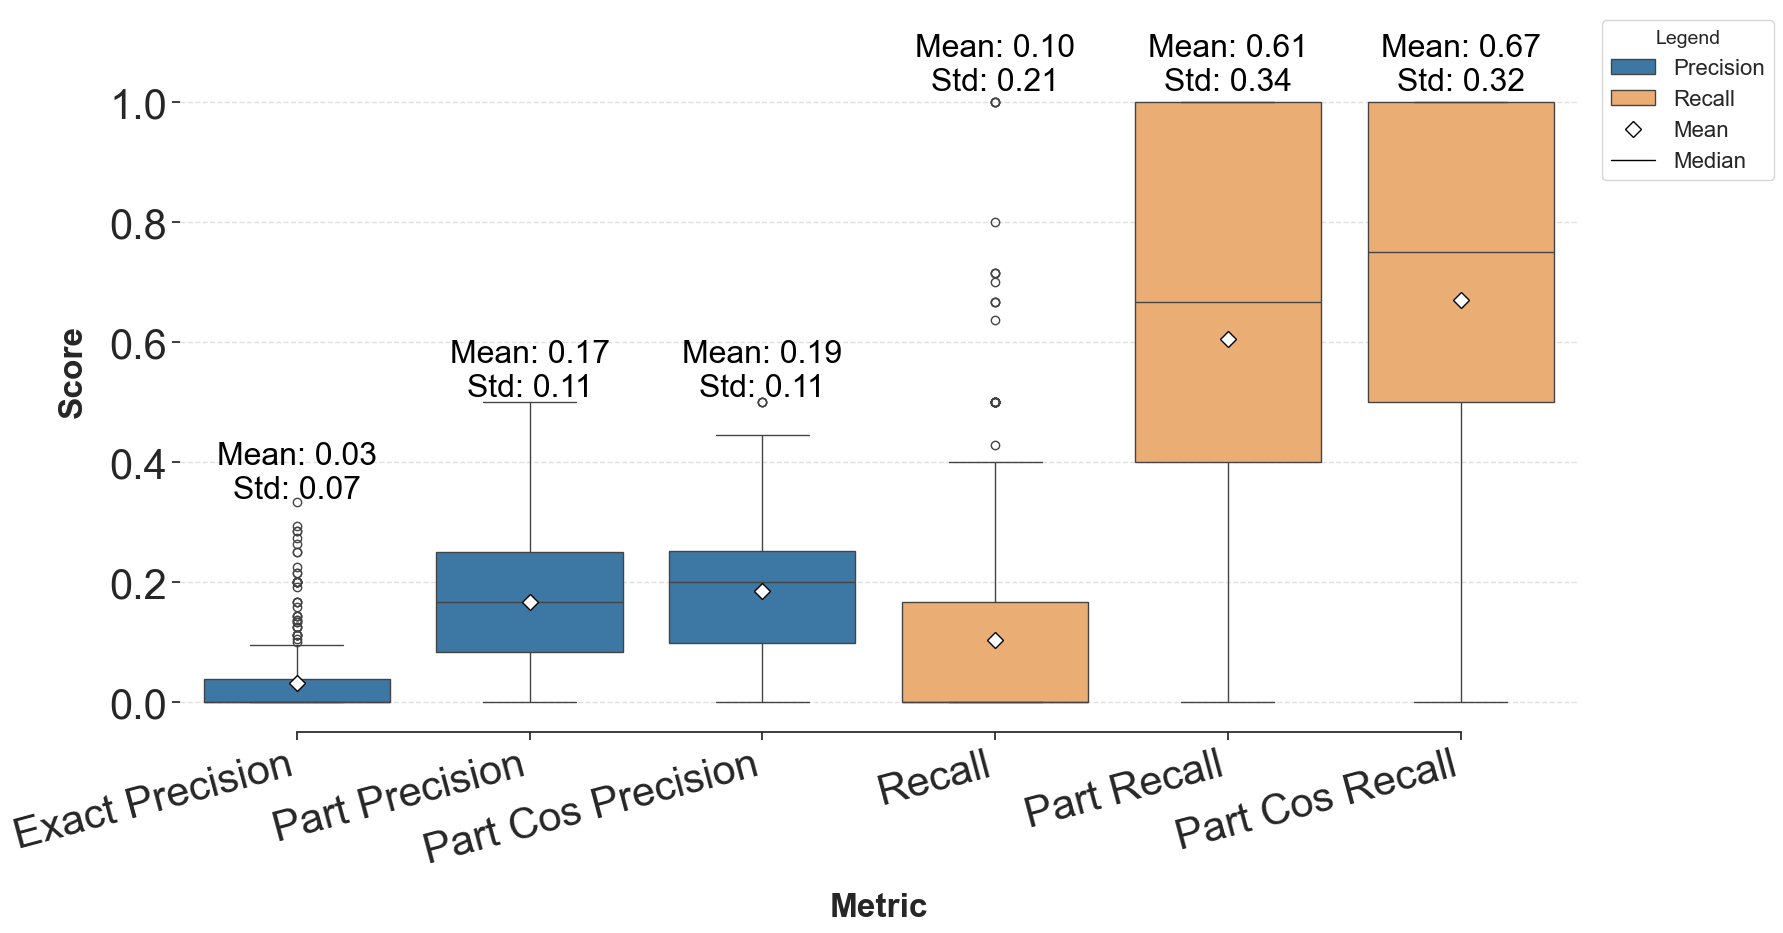

In [19]:

from utils.ploting import create_professional_boxplot
metrics_cols = [ 'exact_precision','part_precision', 'part_cos_precision', 'recall', 'part_recall', 'part_cos_recall' ]
create_professional_boxplot(advancedpattern_results, metrics_cols, "plot_title", "plot_subtitle", "patterns_advanced")

In [ ]:
advancedpattern_results

,exact_matches,partial_matches,len_cosine_sim_truth,missing_from_truth,len_summ,len_truth,total_inserted,cosine_sim_pat_extract,pat_in_extracted_sentence,pxtraced_pattern_not_in_text_hall,...,pat_in_extracted_sentence_fraction,extraced_pattern_in_text_fraq,hall,extracted_sentence_not_in_text_hall_frac,exact_precision,part_precision,part_cos_precision,recall,part_recall,part_cos_recall
0,0,1,0,1,4,2,4,0.326350,0,4,...,0.000000,0.000000,4,1.000000,0.000000,0.200000,0.200000,0.000,0.500000,0.500000
1,1,3,0,1,13,5,13,0.414585,0,22,...,0.000000,0.000000,13,0.909091,0.058824,0.235294,0.235294,0.200,0.800000,0.800000
2,0,2,0,0,8,2,8,0.399376,4,4,...,0.500000,0.600000,4,1.000000,0.000000,0.200000,0.200000,0.000,1.000000,1.000000
3,0,3,0,1,6,4,6,0.611168,0,58,...,0.000000,0.000000,6,0.948276,0.000000,0.333333,0.333333,0.000,0.750000,0.750000
4,3,3,1,1,15,6,15,0.361369,5,14,...,0.333333,0.066667,10,1.000000,0.136364,0.272727,0.318182,0.375,0.750000,0.875000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0,2,0,3,6,5,6,0.401323,6,1,...,1.000000,0.909091,0,0.909091,0.000000,0.250000,0.250000,0.000,0.400000,0.400000
296,0,1,0,2,10,3,10,0.433346,0,12,...,0.000000,0.000000,10,0.916667,0.000000,0.090909,0.090909,0.000,0.333333,0.333333
297,0,2,0,2,6,4,6,0.240737,3,4,...,0.500000,0.636364,3,1.000000,0.000000,0.250000,0.250000,0.000,0.500000,0.500000
298,0,3,0,1,15,4,15,0.255809,8,1,...,0.533333,0.965517,7,0.965517,0.000000,0.166667,0.166667,0.000,0.750000,0.750000


In [ ]:
advancedpattern_results['result_percentage_exact'] = advancedpattern_results['exact_matches'] / advancedpattern_results['len_truth']
advancedpattern_results['result_percentage_partial'] = advancedpattern_results['partial_matches'] / advancedpattern_results['len_truth']

advancedpattern_results['result_percentage_cosine_sim_truth'] = advancedpattern_results['len_cosine_sim_truth'] / advancedpattern_results['len_truth']
advancedpattern_results

,exact_matches,partial_matches,len_cosine_sim_truth,missing_from_truth,len_summ,len_truth,total_inserted,cosine_sim_pat_extract,pat_in_extracted_sentence,pxtraced_pattern_not_in_text_hall,...,extracted_sentence_not_in_text_hall_frac,exact_precision,part_precision,part_cos_precision,recall,part_recall,part_cos_recall,result_percentage_exact,result_percentage_partial,result_percentage_cosine_sim_truth
0,0,1,0,1,4,2,4,0.326350,0,4,...,1.000000,0.000000,0.200000,0.200000,0.000,0.500000,0.500000,0.0,0.500000,0.000000
1,1,3,0,1,13,5,13,0.414585,0,22,...,0.909091,0.058824,0.235294,0.235294,0.200,0.800000,0.800000,0.2,0.600000,0.000000
2,0,2,0,0,8,2,8,0.399376,4,4,...,1.000000,0.000000,0.200000,0.200000,0.000,1.000000,1.000000,0.0,1.000000,0.000000
3,0,3,0,1,6,4,6,0.611168,0,58,...,0.948276,0.000000,0.333333,0.333333,0.000,0.750000,0.750000,0.0,0.750000,0.000000
4,3,3,1,1,15,6,15,0.361369,5,14,...,1.000000,0.136364,0.272727,0.318182,0.375,0.750000,0.875000,0.5,0.500000,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0,2,0,3,6,5,6,0.401323,6,1,...,0.909091,0.000000,0.250000,0.250000,0.000,0.400000,0.400000,0.0,0.400000,0.000000
296,0,1,0,2,10,3,10,0.433346,0,12,...,0.916667,0.000000,0.090909,0.090909,0.000,0.333333,0.333333,0.0,0.333333,0.000000
297,0,2,0,2,6,4,6,0.240737,3,4,...,1.000000,0.000000,0.250000,0.250000,0.000,0.500000,0.500000,0.0,0.500000,0.000000
298,0,3,0,1,15,4,15,0.255809,8,1,...,0.965517,0.000000,0.166667,0.166667,0.000,0.750000,0.750000,0.0,0.750000,0.000000


Descriptive Statistics:

count    295.000
mean       0.127
std        0.307
min        0.000
25%        0.000
50%        0.000
75%        0.167
max        3.000
Name: result_percentage_exact, dtype: float64


<module 'matplotlib.pyplot' from '/Users/polabedzka/Desktop/masters/camridge/THESIS/evaluation_pipeline/.venv/lib/python3.10/site-packages/matplotlib/pyplot.py'>

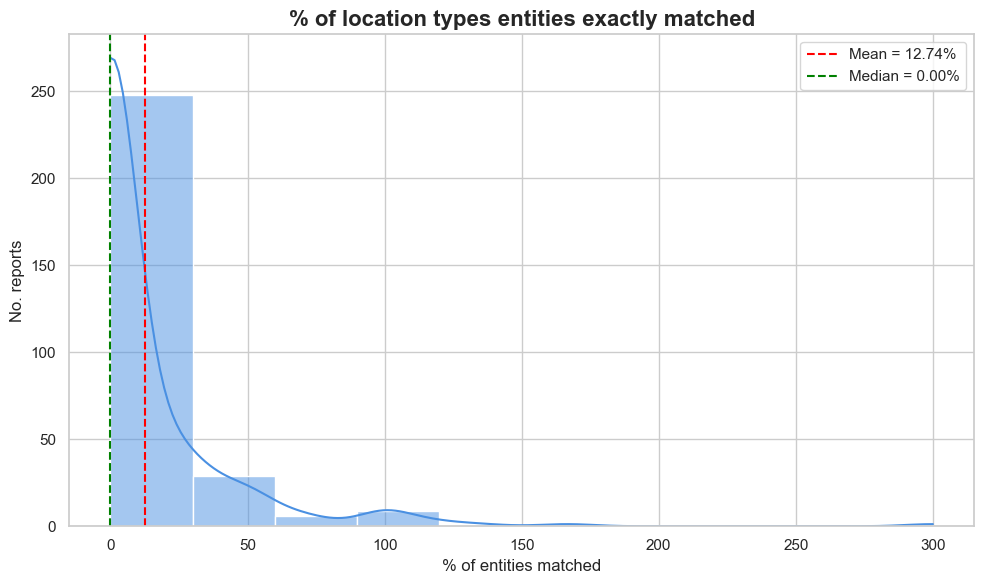

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def plot_distrib(df, col, title):
    desc_stats = df[col].describe()
    print("Descriptive Statistics:\n")
    print(desc_stats.round(3))

    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(10, 6))

    df[col] = df[col]*100
    sns.histplot(df[col], bins=10, kde=True, color="#4A90E2", edgecolor="white")

    # --- Add Mean & Median Lines ---
    mean_val = df[col].mean()
    median_val = df[col].median()
    plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean = {mean_val:.2f}%')
    plt.axvline(median_val, color='green', linestyle='--', label=f'Median = {median_val:.2f}%')

    # --- Labels & Styling ---
    plt.title(title, fontsize=16, weight='bold')
    plt.xlabel("% of entities matched", fontsize=12)
    plt.ylabel("No. reports", fontsize=12)
    plt.legend()
    plt.tight_layout()
    
    return plt
plot_distrib(advancedpattern_results,"result_percentage_exact", "% of location types entities exactly matched")

Descriptive Statistics:

count    295.000
mean       0.509
std        0.345
min        0.000
25%        0.200
50%        0.500
75%        0.750
max        1.000
Name: result_percentage_partial, dtype: float64


<module 'matplotlib.pyplot' from '/Users/polabedzka/Desktop/masters/camridge/THESIS/evaluation_pipeline/.venv/lib/python3.10/site-packages/matplotlib/pyplot.py'>

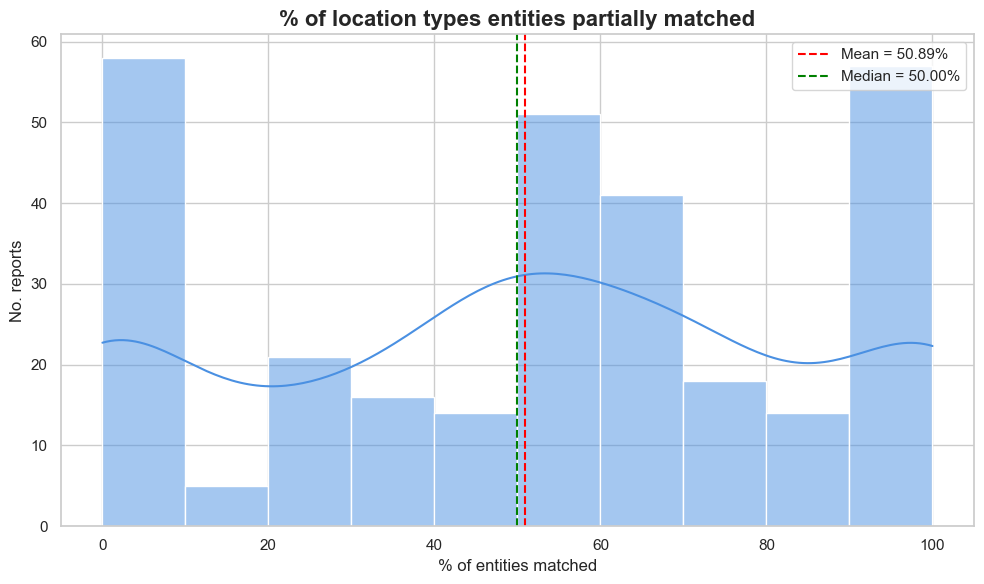

In [ ]:
plot_distrib(advancedpattern_results, 'result_percentage_partial', "% of location types entities partially matched")

Descriptive Statistics:

count    295.000
mean       0.064
std        0.175
min        0.000
25%        0.000
50%        0.000
75%        0.000
max        1.000
Name: result_percentage_cosine_sim_truth, dtype: float64


<module 'matplotlib.pyplot' from '/Users/polabedzka/Desktop/masters/camridge/THESIS/evaluation_pipeline/.venv/lib/python3.10/site-packages/matplotlib/pyplot.py'>

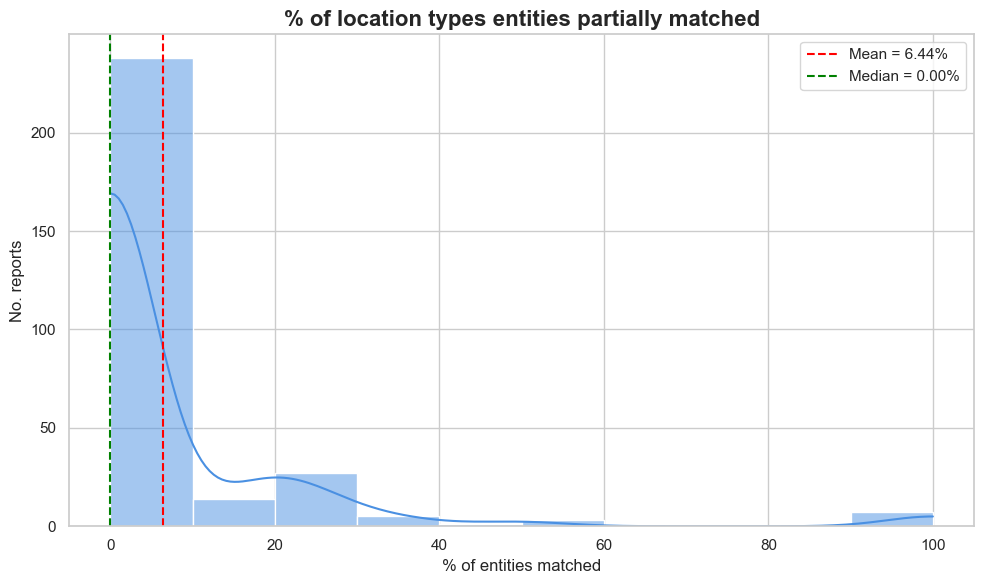

In [ ]:
plot_distrib(advancedpattern_results, 'result_percentage_cosine_sim_truth', "% of location types entities partially matched")

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

df = advancedpattern_results.copy()
y_axis_col = 'len_summ'
x_axis_col = 'len_truth'

# --- Calculate Regression Statistics ---
# Use scipy.stats.linregress to get detailed regression results
# It's important to drop any NaN values for the calculation to work
clean_df = df[[x_axis_col, y_axis_col]].dropna()
slope, intercept, r_value, p_value, std_err = linregress(
    clean_df[x_axis_col],
    clean_df[y_axis_col]
)
r_squared = r_value**2

# --- Calculate Descriptive Statistics ---
x_stats = df[x_axis_col].describe()
y_stats = df[y_axis_col].describe()

# --- Plotting ---
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 7))

# Create the scatter plot
scatter_plot = sns.regplot(
    x=x_axis_col,
    y=y_axis_col,
    data=df,
    scatter_kws={'alpha': 0.6, 's': 80, 'color': '#4A90E2'}, # Style the points
    line_kws={'color': 'red', 'linestyle': '--'} # Style the regression line
)

# --- Labels & Styling ---
plt.xlabel('Number of injected patterns in a case', fontsize=18)
plt.ylabel('Number inferred patterns in a case', fontsize=18)

# --- Add Descriptive Statistics to the plot ---
# Create a formatted multiline string with descriptive statistics for both axes
stats_text = f"""
{'Metric':<15} {'Injected':<10} {'Inferred':<10}
{'-'*15} {'-'*10} {'-'*10}
{'Mean':<15} {x_stats['mean']:<10.2f} {y_stats['mean']:<10.2f}
{'Median':<15} {x_stats['50%']:<10.2f} {y_stats['50%']:<10.2f}
{'Std Dev':<15} {x_stats['std']:<10.2f} {y_stats['std']:<10.2f}
{'Min':<15} {x_stats['min']:<10.0f} {y_stats['min']:<10.0f}
{'Max':<15} {x_stats['max']:<10.0f} {y_stats['max']:<10.0f}
"""
Slope = {slope:.4f}"""

# Place the text box on the plot for easy reference
plt.text(0.75, 0.90, stats_text, transform=plt.gca().transAxes, fontsize=18,
         verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.8))

# Save the figure with a tight bounding box
plt.tight_layout()
plt.savefig("plots/patterns_length_rel.svg", bbox_inches='tight')

plt.show()

# --- Print Descriptive and Regression Statistics to Console ---
print("="*40)
print("      Regression Statistics")
print("="*40)
print(f"Slope: {slope:.4f}")
print(f"Intercept: {intercept:.4f}")
print(f"R-value (Correlation Coefficient): {r_value:.4f}")
print(f"R-squared: {r_squared:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Standard Error of the Estimate: {std_err:.4f}")
print("\n" + "="*40 + "\n")

print("Descriptive Statistics for X-Axis:\n")
print(df[x_axis_col].describe().round(3))
print("\n" + "="*40 + "\n")
print("Descriptive Statistics for Y-Axis:\n")
print(df[y_axis_col].describe().round(3))

SyntaxError: invalid decimal literal (3351155016.py, line 47)

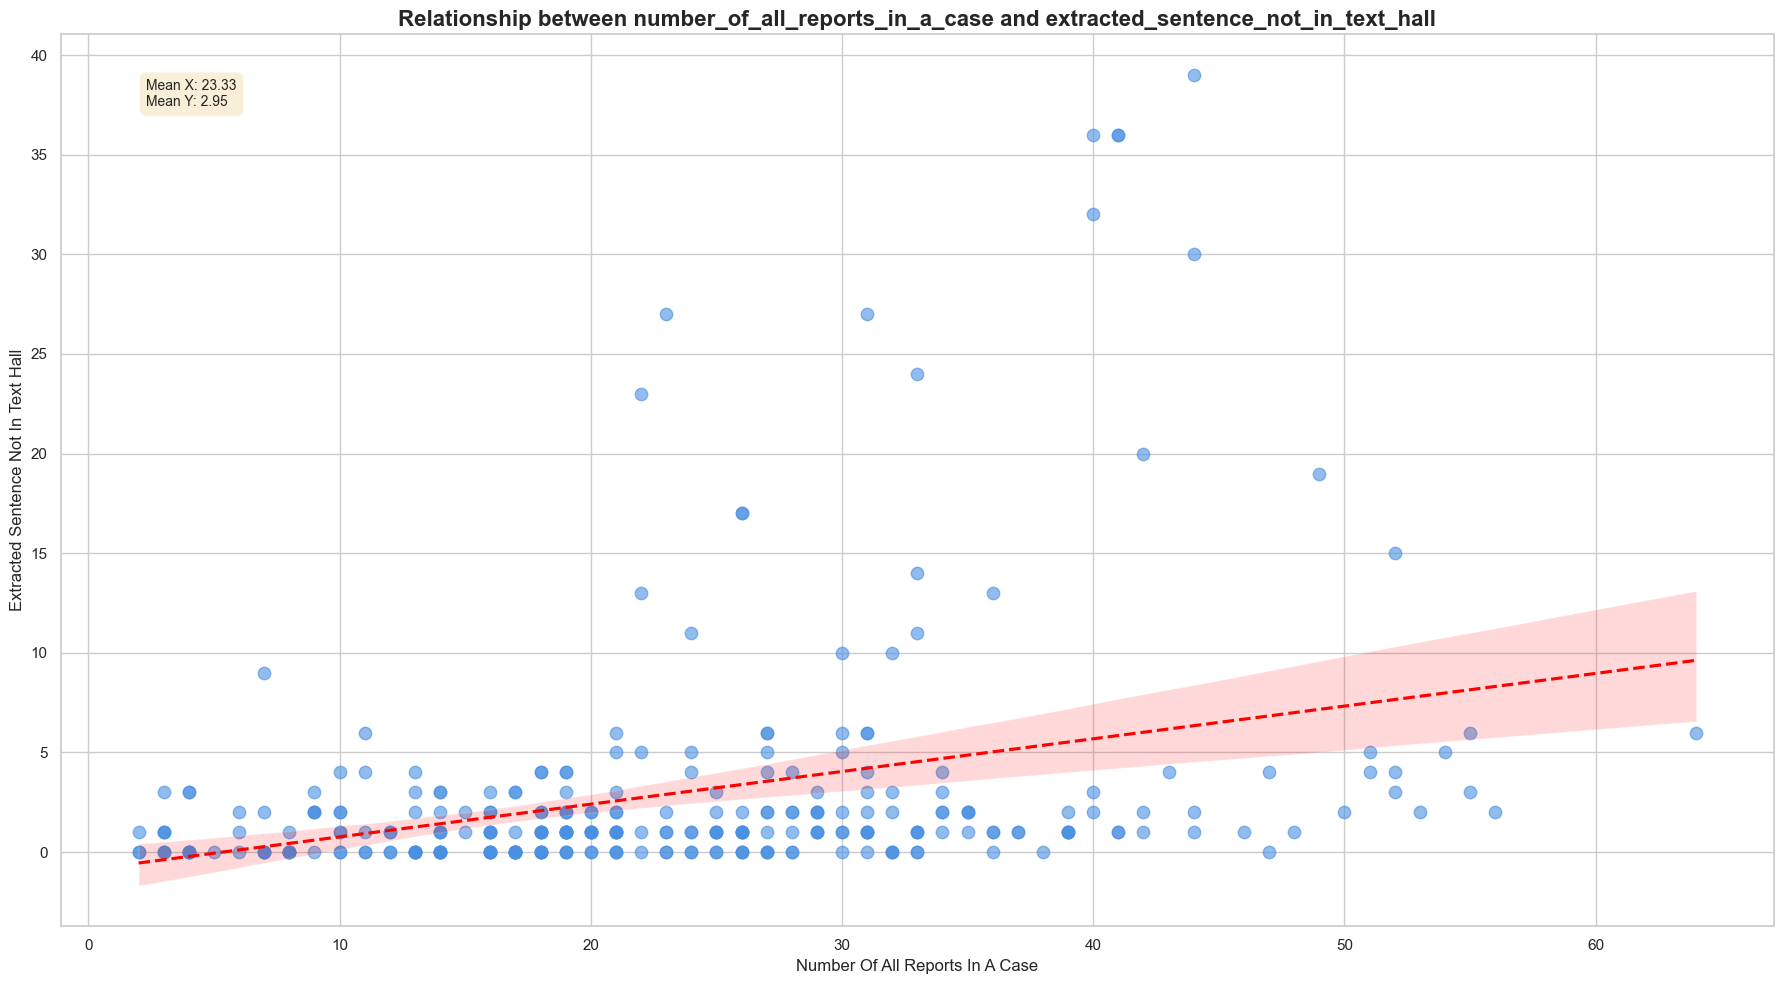

Descriptive Statistics for X-Axis:

count    298.000
mean      23.326
std       12.276
min        2.000
25%       14.250
50%       21.000
75%       31.000
max       64.000
Name: number_of_all_reports_in_a_case, dtype: float64


Descriptive Statistics for Y-Axis:

count    300.000
mean       2.953
std        6.104
min        0.000
25%        0.000
50%        1.000
75%        3.000
max       39.000
Name: extracted_sentence_not_in_text_hall, dtype: float64


In [ ]:
# Type III hall
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = advancedpattern_results.copy()

y_axis_col= 'extracted_sentence_not_in_text_hall'
x_axis_col = 'number_of_all_reports_in_a_case'

# --- Plotting ---
sns.set_theme(style="whitegrid")
plt.figure(figsize=(18, 10))

# Create the scatter plot
# Using regplot adds a regression line to show the trend
scatter_plot = sns.regplot(
    x=df[x_axis_col],
    y=df[y_axis_col],
    scatter_kws={'alpha': 0.6, 's': 80, 'color': '#4A90E2'}, # Style the points
    line_kws={'color': 'red', 'linestyle': '--'} # Style the regression line
)

# --- Labels & Styling ---
plt.title(f'Relationship between {x_axis_col} and {y_axis_col}', fontsize=16, weight='bold')
plt.xlabel(x_axis_col.replace('_', ' ').title(), fontsize=12)
plt.ylabel(y_axis_col.replace('_', ' ').title(), fontsize=12)

# --- Add Descriptive Statistics to the plot ---
# You can uncomment this section to display stats on the plot if you wish
x_mean = df[x_axis_col].mean()
y_mean = df[y_axis_col].mean()
stats_text = (f"Mean X: {x_mean:.2f}\n"
              f"Mean Y: {y_mean:.2f}")
plt.text(0.05, 0.95, stats_text, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.5))


plt.tight_layout()
plt.show()

# --- Print Descriptive Statistics to Console ---
print("Descriptive Statistics for X-Axis:\n")
print(df[x_axis_col].describe().round(3))
print("\n" + "="*40 + "\n")
print("Descriptive Statistics for Y-Axis:\n")
print(df[y_axis_col].describe().round(3))
